Hubble Constant (H_0): 2.184285241085502e-18 1 / s
Speed of Light (c): 299792458.0 m / s
Gravitational Constant (G): 6.6743e-11 m3 / (kg s2)
Deceleration Parameter (q0): -0.534
Error: 'C:\Users\haric\Documents\India Space Academy\Skyserver_SQL6_16_2025 2_12_11 PM.csv' not found. Creating dummy DataFrame for demonstration.
Description of 'specz' in averaged DataFrame:
count    100.000000
mean       0.099947
std        0.010214
min        0.071669
25%        0.093550
50%        0.100316
75%        0.106475
max        0.131411
Name: specz, dtype: float64
Mean redshift for cluster identification: 0.0999
Standard deviation of redshift for cluster identification: 0.0102
Lower limit (Mean - 3*sigma): 0.0695
Upper limit (Mean + 3*sigma): 0.1304


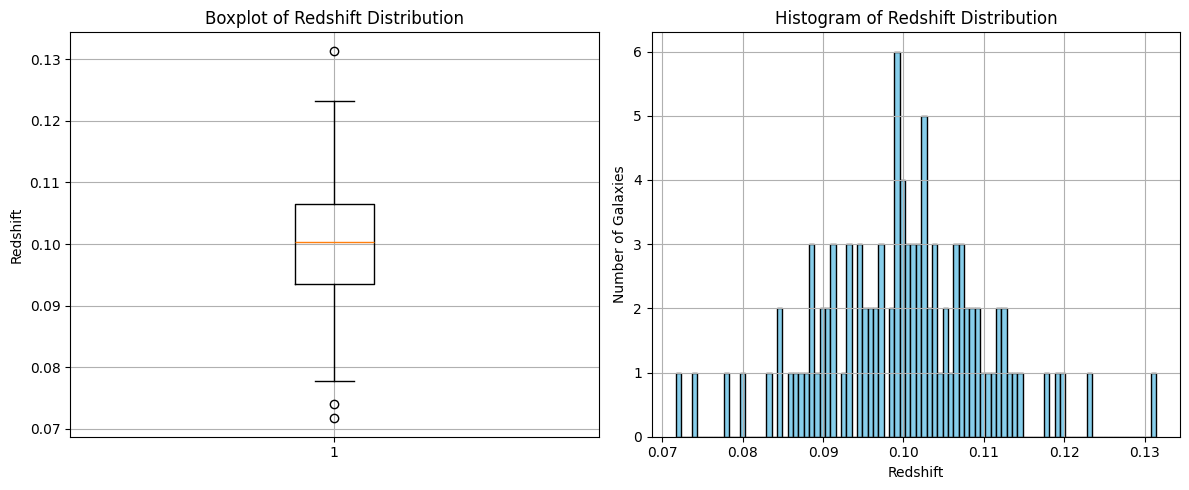

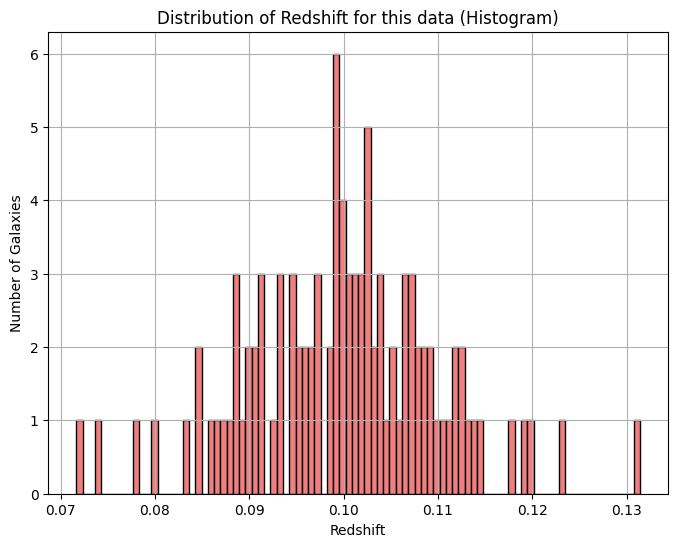

Original number of objects: 100
Number of objects after 3-sigma redshift cut: 99
Filtered DataFrame head:
   objid     specz          ra        dec  proj_sep
0      0  0.101585  141.785907 -76.240624  3.992217
1      1  0.105432   89.953716  61.727602  1.209579
2      2  0.088584  304.752526  29.241246  1.756677
3      3  0.084328   88.885961 -19.842911  8.573902
4      4  0.088879   83.962189 -33.967691  7.723638
DataFrame with new 'velocity' column:
   objid     specz      velocity
0      0  0.101585  30454.394363
1      1  0.105432  31607.682475
2      2  0.088584  26556.767469
3      3  0.084328  25280.767839
4      4  0.088879  26645.365861


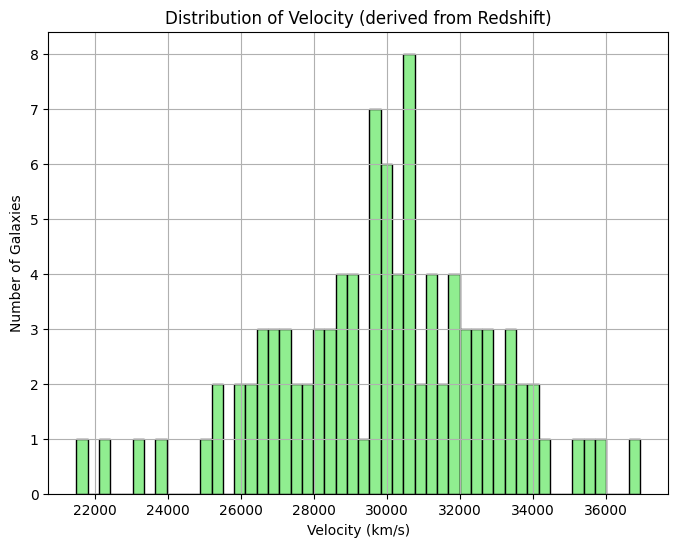

Cluster redshift: 0.0996
Cluster line-of-sight velocity dispersion (sigma): 2649.8384 km/s.
Descriptive statistics for relative velocities (dispersion):
count      99.000000
mean      -11.679822
std      2663.323637
min     -7719.665342
25%     -1666.471958
50%       144.427950
75%      1813.699604
max      6362.303266
Name: relative_velocity_kms, dtype: float64


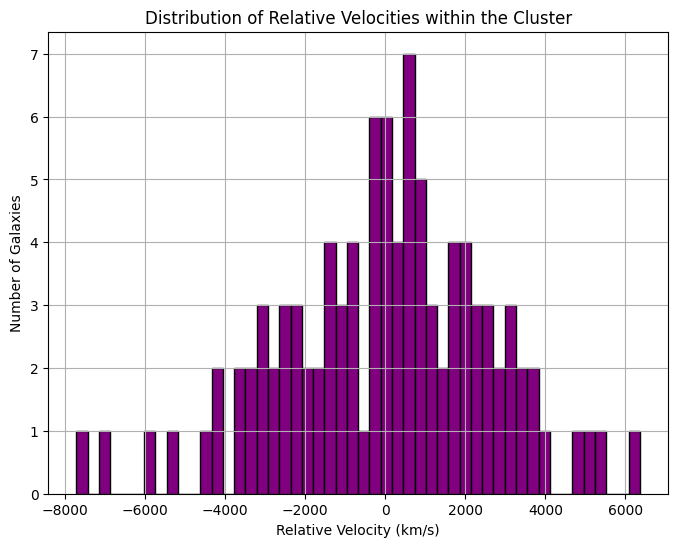

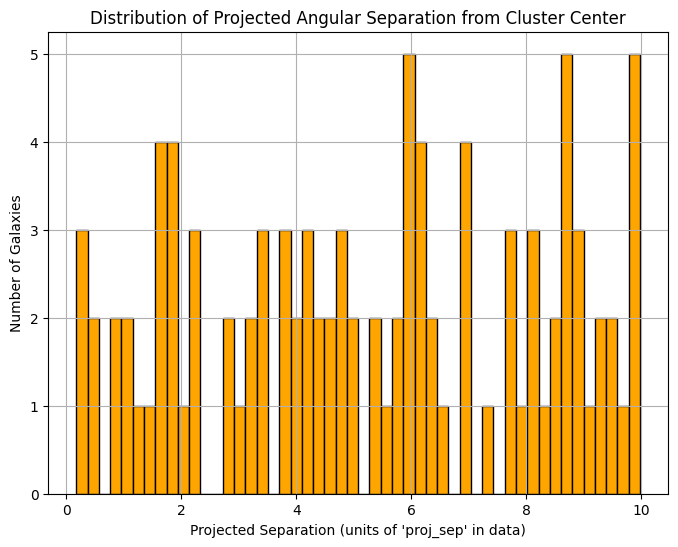

Co-moving distance (r): 432.86 Mpc
Angular Diameter Distance (D_A): 393.64 Mpc
Estimated physical diameter of the cluster: 1.14 Mpc Mpc
Dynamical Mass of the cluster is 2.78e+15 solar masses


In [ ]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G, c
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

# 2. Define key physical constants
#    2.1. Hubble constant (Planck 2018 value, converted to SI)
H_0 = (67.4 * u.km / u.s / u.Mpc).to(1/u.s)
#    2.2. Deceleration parameter (Planck fit)
q0 = -0.534

print(f"Hubble Constant (H_0): {H_0}")
print(f"Speed of Light (c): {c}")
print(f"Gravitational Constant (G): {G}")
print(f"Deceleration Parameter (q0): {q0}")

# 3. Read CSV data
#    3.1. CSV file path
file_name = r"C:\Users\haric\Documents\India Space Academy\Skyserver_SQL6_16_2025 2_12_11 PM.csv"

try:
    #    3.2. Read CSV, assuming header is on the second row (index 1)
    df = pd.read_csv(file_name, header=1)
    print(f"Successfully loaded '{file_name}'. Shape: {df.shape}")
    print("Columns after loading:", df.columns.tolist())
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Creating dummy DataFrame for demonstration.")
    dummy_data = {
        'objid': np.arange(100), 'specz': np.random.normal(0.1, 0.01, 100),
        'ra': np.random.uniform(0, 360, 100), 'dec': np.random.uniform(-90, 90, 100),
        'proj_sep': np.random.uniform(0.1, 10, 100)
    }
    df = pd.DataFrame(dummy_data)
except Exception as e:
    print(f"An unexpected error occurred while reading the CSV: {e}")

# 4. Calculate average spectroscopic redshift per object
#    4.1. Define required columns
required_columns = ['objid', 'specz', 'ra', 'dec', 'proj_sep']
#    4.2. Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing required columns: {missing_columns}. Available columns: {df.columns.tolist()}")
    exit()

#    4.3. Group by 'objid' and aggregate
averaged_df = df.groupby('objid').agg({
    'specz': 'mean', 'ra': 'first', 'dec': 'first', 'proj_sep': 'first',
}).reset_index()

print("Description of 'specz' in averaged DataFrame:")
print(averaged_df.describe()['specz'])

#    4.4. Ensure 'specz' is numeric and drop NaNs
averaged_df['specz'] = pd.to_numeric(averaged_df['specz'], errors='coerce')
averaged_df.dropna(subset=['specz'], inplace=True)

# 5. Determine redshift cluster limits (3-sigma cut)
#    5.1. Use 'specz' from averaged_df
redshift_data_for_cluster = averaged_df['specz']

#    5.2. Calculate mean, standard deviation, and 3-sigma limits
mean_cluster_redshift = np.mean(redshift_data_for_cluster)
std_dev_cluster_redshift = np.std(redshift_data_for_cluster)
lower_limit_3sigma = mean_cluster_redshift - (3 * std_dev_cluster_redshift)
upper_limit_3sigma = mean_cluster_redshift + (3 * std_dev_cluster_redshift)

print(f"Mean redshift for cluster identification: {mean_cluster_redshift:.4f}")
print(f"Standard deviation of redshift for cluster identification: {std_dev_cluster_redshift:.4f}")
print(f"Lower limit (Mean - 3*sigma): {lower_limit_3sigma:.4f}")
print(f"Upper limit (Mean + 3*sigma): {upper_limit_3sigma:.4f}")

# 6. Visualize redshift distribution
#    6.1. Boxplot and Histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(averaged_df['specz'])
plt.title("Boxplot of Redshift Distribution")
plt.ylabel("Redshift")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(averaged_df['specz'], bins=90, color='skyblue', edgecolor='black')
plt.title("Histogram of Redshift Distribution")
plt.xlabel("Redshift")
plt.ylabel("Number of Galaxies")
plt.grid(True)

plt.tight_layout()
plt.show()

#    6.2. Separate histogram for clarity (optional, as it's in 6.1)
plt.figure(figsize=(8, 6))
plt.hist(averaged_df['specz'], bins=90, color='lightcoral', edgecolor='black')
plt.title("Distribution of Redshift for this data (Histogram)")
plt.xlabel("Redshift")
plt.ylabel("Number of Galaxies")
plt.grid(True)
plt.show()

# 7. Filter data based on 3-sigma redshift cut
filtered_df = averaged_df[
    (averaged_df['specz'] >= lower_limit_3sigma) &
    (averaged_df['specz'] <= upper_limit_3sigma)
].copy()

print(f"Original number of objects: {len(averaged_df)}")
print(f"Number of objects after 3-sigma redshift cut: {len(filtered_df)}")
print("Filtered DataFrame head:")
print(filtered_df.head())

# 8. Add velocity column (derived from redshift)
#    8.1. Calculate velocity (simplified relativistic Doppler)
filtered_df['velocity'] = filtered_df['specz'] * c.to(u.km/u.s).value

print("DataFrame with new 'velocity' column:")
print(filtered_df[['objid', 'specz', 'velocity']].head())

#    8.2. Plot velocity distribution
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['velocity'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of Velocity (derived from Redshift)")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Number of Galaxies")
plt.grid(True)
plt.show()

# 9. Calculate cluster velocity dispersion
#    9.1. Mean redshift of filtered cluster members
cluster_redshift = filtered_df['specz'].mean()

#    9.2. Calculate relative velocities using relativistic Doppler formula
z_galaxy = filtered_df['specz']
z_cluster = cluster_redshift
v_rel = c.value * ((1 + z_galaxy)**2 - (1 + z_cluster)**2) / ((1 + z_galaxy)**2 + (1 + z_cluster)**2)

#    9.3. Convert relative velocities to km/s
v_rel_kms = v_rel / 1000

#    9.4. Cluster velocity dispersion (standard deviation of relative velocities)
disp = np.std(v_rel_kms)
filtered_df['relative_velocity_kms'] = v_rel_kms

print(f"Cluster redshift: {cluster_redshift:.4f}")
print(f"Cluster line-of-sight velocity dispersion (sigma): {disp:.4f} km/s.")

#    9.5. Descriptive statistics for relative velocities
print("Descriptive statistics for relative velocities (dispersion):")
print(filtered_df['relative_velocity_kms'].describe())

#    9.6. Plot relative velocity distribution
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['relative_velocity_kms'], bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Relative Velocities within the Cluster")
plt.xlabel("Relative Velocity (km/s)")
plt.ylabel("Number of Galaxies")
plt.grid(True)
plt.show()

# 10. Visualize angular separation
#     10.1. Plot histogram for projected separation
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['proj_sep'], bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Projected Angular Separation from Cluster Center")
plt.xlabel("Projected Separation (units of 'proj_sep' in data)")
plt.ylabel("Number of Galaxies")
plt.grid(True)
plt.show()

# 11. Determine cluster size and mass
#     11.1. Estimate physical diameter
#           11.1.1. Co-moving distance (Taylor expansion approx.)
r_comoving = (c / H_0) * z_cluster * (1 - (z_cluster / 2) * (1 + q0))
r_comoving_Mpc = r_comoving.to(u.Mpc)

#           11.1.2. Angular Diameter Distance
D_A = r_comoving / (1 + z_cluster)
D_A_Mpc = D_A.to(u.Mpc)

#           11.1.3. Estimate physical diameter from max projected separation (assuming arcminutes)
theta_arcmin = filtered_df['proj_sep'].max() * u.arcmin
theta_radians = theta_arcmin.to(u.rad)
# Corrected: diameter is already a Quantity with u.Mpc, so convert it directly to meters
diameter = D_A_Mpc * theta_radians.value

print(f"Co-moving distance (r): {r_comoving_Mpc:.2f}")
print(f"Angular Diameter Distance (D_A): {D_A_Mpc:.2f}")
print(f"Estimated physical diameter of the cluster: {diameter:.2f} Mpc")

#     11.2. Calculate dynamical mass (using virial theorem)
#           11.2.1. Convert velocity dispersion to m/s
sigma_ms = disp * 1000 * u.m / u.s

#           11.2.2. Convert cluster diameter to meters and get radius
# FIX APPLIED HERE: diameter is already a Quantity with u.Mpc, convert directly to u.m
R_meters = diameter.to(u.m) * 0.5

#           11.2.3. Calculate dynamical mass in kg
M_dyn_kg = (3 * sigma_ms**2 * R_meters / G).to(u.kg)

#           11.2.4. Convert to solar masses
solar_mass_approx = 2e30 * u.kg
M_dyn_solar_mass = M_dyn_kg / solar_mass_approx

print(f"Dynamical Mass of the cluster is {M_dyn_solar_mass:.2e} solar masses")
